In [1]:
#import necessary package
import numpy as np # linear algebra
import pandas as pd # data processing
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [2]:
#check current directory
os.getcwd()

'C:\\Users\\HP\\ML'

In [3]:
os.chdir("G:\\Araiba_Database\\MNIST")

In [4]:
#load Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
#analyse data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()
#In Test data there is no label as we have to classify test instances

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Find the shape of data
train.shape

(42000, 785)

In [8]:
test.shape #train has 42000 rows and 784 columns whereas test has 28000 rows and 784 columns
#Each feature here is pixel of given instance

(28000, 784)

In [9]:
#Seperate label from train data
y = train['label']
X = train.drop('label',axis=1)

In [10]:
#Here we convert our 10 integers into one hot encoder (as an array of 10 classes)
y = pd.get_dummies(y)
y.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [11]:
X.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [12]:
#scaling pixel intensities down to the 0-1 range by dividing them by 255. 
X = X/255
test = test/255

In [13]:
# every image should be represented as a 28×28 array
# so converting each row of 784 columns in 28x28 array
X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

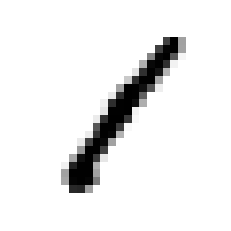

In [14]:
image = X[0]
plt.imshow(image,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [16]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600, 10)
(8400, 10)


In [17]:
#Creating a NN model using single hidden layer


def define_model(activations):
    model =keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28,28]))
    model.add(keras.layers.Dense(150,activation=activations))
    model.add(keras.layers.Dense(10, activation="softmax"))
    optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    model.compile(optimizer=optimizer,loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
    return model

In [34]:
model1 = define_model("relu")
history = model1.fit(X_train,y_train,epochs= 50, verbose = 2,validation_data=(X_valid, y_valid))

Epoch 1/50
1050/1050 - 6s - loss: 0.3084 - accuracy: 0.9126 - val_loss: 0.1874 - val_accuracy: 0.9464
Epoch 2/50
1050/1050 - 5s - loss: 0.1467 - accuracy: 0.9563 - val_loss: 0.1326 - val_accuracy: 0.9617
Epoch 3/50
1050/1050 - 8s - loss: 0.1049 - accuracy: 0.9688 - val_loss: 0.1175 - val_accuracy: 0.9662
Epoch 4/50
1050/1050 - 7s - loss: 0.0805 - accuracy: 0.9767 - val_loss: 0.1141 - val_accuracy: 0.9661
Epoch 5/50
1050/1050 - 9s - loss: 0.0648 - accuracy: 0.9814 - val_loss: 0.1076 - val_accuracy: 0.9699
Epoch 6/50
1050/1050 - 5s - loss: 0.0519 - accuracy: 0.9854 - val_loss: 0.1099 - val_accuracy: 0.9708
Epoch 7/50
1050/1050 - 5s - loss: 0.0448 - accuracy: 0.9870 - val_loss: 0.1034 - val_accuracy: 0.9719
Epoch 8/50
1050/1050 - 4s - loss: 0.0368 - accuracy: 0.9889 - val_loss: 0.1018 - val_accuracy: 0.9749
Epoch 9/50
1050/1050 - 5s - loss: 0.0313 - accuracy: 0.9910 - val_loss: 0.1003 - val_accuracy: 0.9758
Epoch 10/50
1050/1050 - 5s - loss: 0.0262 - accuracy: 0.9927 - val_loss: 0.1140 - 

In [27]:
model2 = define_model("tanh")
history2 = model2.fit(X_train,y_train,epochs=50, verbose = 2,validation_data=(X_valid, y_valid))

Epoch 1/50
1050/1050 - 12s - loss: 0.3295 - accuracy: 0.9041 - val_loss: 0.2349 - val_accuracy: 0.9300
Epoch 2/50
1050/1050 - 5s - loss: 0.1762 - accuracy: 0.9483 - val_loss: 0.1696 - val_accuracy: 0.9498
Epoch 3/50
1050/1050 - 4s - loss: 0.1268 - accuracy: 0.9621 - val_loss: 0.1332 - val_accuracy: 0.9594
Epoch 4/50
1050/1050 - 4s - loss: 0.0974 - accuracy: 0.9710 - val_loss: 0.1222 - val_accuracy: 0.9625
Epoch 5/50
1050/1050 - 5s - loss: 0.0793 - accuracy: 0.9771 - val_loss: 0.1083 - val_accuracy: 0.9679
Epoch 6/50
1050/1050 - 5s - loss: 0.0645 - accuracy: 0.9817 - val_loss: 0.1024 - val_accuracy: 0.9683
Epoch 7/50
1050/1050 - 4s - loss: 0.0548 - accuracy: 0.9836 - val_loss: 0.1022 - val_accuracy: 0.9705
Epoch 8/50
1050/1050 - 5s - loss: 0.0463 - accuracy: 0.9871 - val_loss: 0.0943 - val_accuracy: 0.9725
Epoch 9/50
1050/1050 - 5s - loss: 0.0401 - accuracy: 0.9889 - val_loss: 0.0968 - val_accuracy: 0.9714
Epoch 10/50
1050/1050 - 6s - loss: 0.0341 - accuracy: 0.9905 - val_loss: 0.0909 -

In [32]:
model3 = define_model("sigmoid")
history3 = model2.fit(X_train,y_train,epochs=50, verbose = 2,validation_data=(X_valid, y_valid))

Epoch 1/50
1050/1050 - 5s - loss: 7.7261e-05 - accuracy: 1.0000 - val_loss: 0.1889 - val_accuracy: 0.9733
Epoch 2/50
1050/1050 - 5s - loss: 2.0682e-05 - accuracy: 1.0000 - val_loss: 0.1936 - val_accuracy: 0.9724
Epoch 3/50
1050/1050 - 5s - loss: 9.5549e-05 - accuracy: 1.0000 - val_loss: 0.1933 - val_accuracy: 0.9744
Epoch 4/50
1050/1050 - 5s - loss: 9.6878e-05 - accuracy: 1.0000 - val_loss: 0.1956 - val_accuracy: 0.9731
Epoch 5/50
1050/1050 - 4s - loss: 6.3986e-05 - accuracy: 1.0000 - val_loss: 0.1996 - val_accuracy: 0.9733
Epoch 6/50
1050/1050 - 5s - loss: 1.5331e-06 - accuracy: 1.0000 - val_loss: 0.2024 - val_accuracy: 0.9742
Epoch 7/50
1050/1050 - 5s - loss: 1.0060e-05 - accuracy: 1.0000 - val_loss: 0.2029 - val_accuracy: 0.9748
Epoch 8/50
1050/1050 - 4s - loss: 4.6239e-05 - accuracy: 1.0000 - val_loss: 0.2093 - val_accuracy: 0.9738
Epoch 9/50
1050/1050 - 5s - loss: 1.5335e-06 - accuracy: 1.0000 - val_loss: 0.2091 - val_accuracy: 0.9733
Epoch 10/50
1050/1050 - 5s - loss: 3.5211e-06 

In [21]:
#we have trained the model using Relu,tanh and sigmoid Activation functions bt
# the loss and accuracy are almost similar in all the models

In [30]:
# define accuracy and loss function
def accuracy(hist):
    plt.plot(hist.history['accuracy'],'-o')
    plt.plot(hist.history['val_accuracy'],'-o')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.xlim((0,50))
    plt.show()

def loss(hist):
    plt.plot(hist.history['loss'],'-o')
    plt.plot(hist.history['val_loss'],'-o')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.xlim((0,50))
    plt.show()

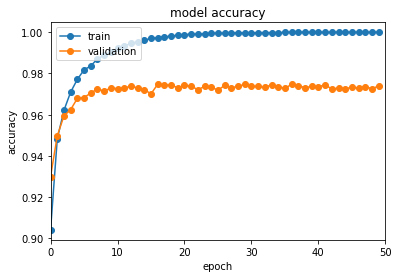

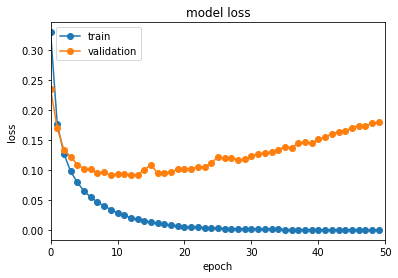

In [31]:
# PLot accuracy and loss along each epoch
accuracy(history2)
loss(history2)

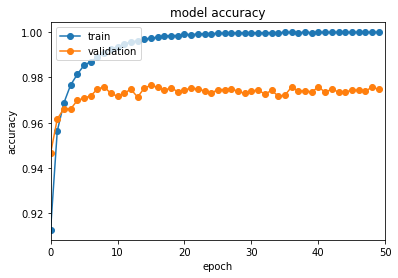

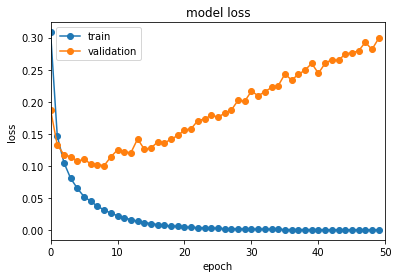

In [35]:
# PLot accuracy and loss along each epoch
accuracy(history)
loss(history)

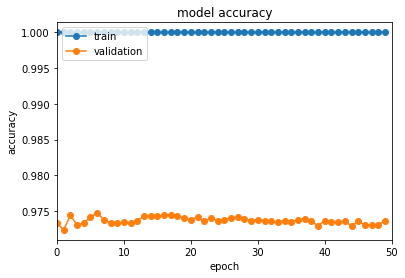

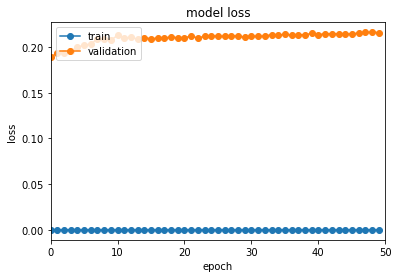

In [33]:
# PLot accuracy and loss along each epoch
accuracy(history3)
loss(history3)

In [36]:
# Learning Parameters
weights ,biases =model2.layers[1].get_weights()

In [37]:
weights

array([[-0.06925895, -0.05213878,  0.03503617, ...,  0.06478168,
        -0.06600817, -0.02690521],
       [ 0.07665001, -0.07093049, -0.07800322, ..., -0.06923223,
         0.03992611,  0.01250336],
       [ 0.02008455,  0.03108454, -0.01869575, ..., -0.07788824,
        -0.05653603, -0.00384842],
       ...,
       [ 0.07686222, -0.06714018, -0.04572453, ..., -0.00989627,
        -0.06278676, -0.03679142],
       [-0.05676292, -0.04111023,  0.0546598 , ...,  0.00802072,
         0.06274816,  0.05155836],
       [ 0.07830781, -0.01689069, -0.0021735 , ...,  0.06481108,
         0.07840885,  0.03125398]], dtype=float32)

In [38]:
biases

array([-0.8731137 ,  0.8159894 , -0.48041415,  0.23998013,  0.0559806 ,
        0.3337144 , -0.31530282, -0.49135926,  0.00952085,  0.3214024 ,
        0.45530248, -0.89451957,  0.14962459,  0.02039843,  0.7106181 ,
        0.57850057, -0.46743795,  0.10376386,  0.15989628,  0.35058606,
       -0.09310737, -0.34045166,  0.6781982 , -0.12779716,  0.28067964,
       -0.17048888, -0.5240464 ,  0.06798913, -0.21691976,  0.18827742,
       -0.74474263, -0.77710795, -0.17165592, -0.46749166,  0.10246482,
        0.60438234, -0.20004536,  0.00154096, -0.05767484, -0.5511784 ,
        0.4229456 ,  0.08614583,  0.29478157,  0.16138767,  0.14633922,
        0.17776474, -0.15956235,  0.5708701 ,  0.13931192, -0.00380259,
       -0.10820913,  0.5560984 ,  0.1134187 , -0.22451901,  0.09228751,
        0.46889716, -0.5792972 ,  0.0465288 ,  0.64945567,  0.556343  ,
       -0.3778631 ,  0.5390866 , -0.45343307, -0.65774727, -0.37920207,
        0.06251231, -0.05718939,  0.55420786,  0.29104745,  0.06

In [39]:
#Evalution of model
model2.evaluate(X_valid,y_valid)

263/263 [==============================] - 3s 7ms/step - loss: 0.2159 - accuracy: 0.9737


[0.21590889990329742, 0.9736904501914978]

In [40]:
#Prediction on Test set
predict = model2.predict(test)

Text(0.5, 1.0, 'True Label: 2')

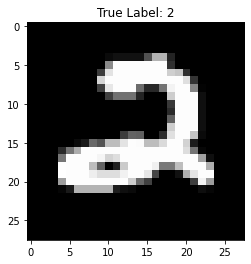

In [41]:
#PLoting first instance of test set
plt.imshow(test[0][:,:,0],cmap="gray")
plt.title("True Label: {}".format(np.argmax(predict[0])))

In [42]:
predict

array([[1.3582245e-24, 1.8636618e-30, 1.0000000e+00, ..., 5.9989946e-22,
        3.6292791e-26, 9.6537011e-23],
       [1.0000000e+00, 1.7415087e-16, 1.4987394e-16, ..., 2.1877364e-15,
        2.6229083e-21, 1.7263754e-23],
       [4.9160410e-13, 1.6664902e-14, 9.9928902e-12, ..., 1.3689585e-12,
        1.8374652e-15, 1.0000000e+00],
       ...,
       [9.6105124e-26, 1.8386539e-26, 8.9767971e-26, ..., 2.0208853e-25,
        1.0742459e-19, 2.6036837e-17],
       [8.2454465e-15, 5.5170832e-19, 3.6130922e-17, ..., 3.0189265e-13,
        6.9357010e-18, 1.0000000e+00],
       [1.4526994e-17, 1.7684162e-21, 1.0000000e+00, ..., 6.1106298e-19,
        2.1684353e-15, 3.4321118e-14]], dtype=float32)

In [43]:
predict = np.argmax(predict, axis =1)

In [44]:
predict = pd.Series(predict, name = "Label")


In [45]:
predict

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [46]:
#the first digit is 2 i.e we predicted correct here
#Saving predictions in csv files
Learning_Activations = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predict],axis = 1)
Learning_Activations.to_csv("Learning_Activations.csv",index=False)